<a href="https://colab.research.google.com/github/Athrudev/Athrudev/blob/main/Expense_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00



===== Personal Finance Manager =====

1. Add a new transaction
2. View transaction and summary within a date range
3. Generate financial report
4. Add a financial goal
5. View your financial goal
6. Exit
Enter your choice(1-6): 2
Enter the start date (dd-mm-yyyy): 1-7-2024
Enter the end date(dd-mm-yyyy): 30-7-2024
transaction from 01-07-2024 to 30-07-2024
      date  amount category         description
01-07-2024   545.0  Expense            bus pass
03-07-2024    25.5  Expense               lunch
05-07-2024  1200.0   Income              salary
07-07-2024    80.0  Expense           groceries
10-07-2024    35.0  Expense       movie tickets
12-07-2024   150.0  Expense    electricity bill
15-07-2024   120.5  Expense           groceries
17-07-2024    60.0  Expense                 gas
20-07-2024   200.0  Expense dinner with friends
22-07-2024    45.0  Expense               books
25-07-2024   500.0   Income      freelance work
27-07-2024    30.0  Expense             haircut
29-07-2024    70.

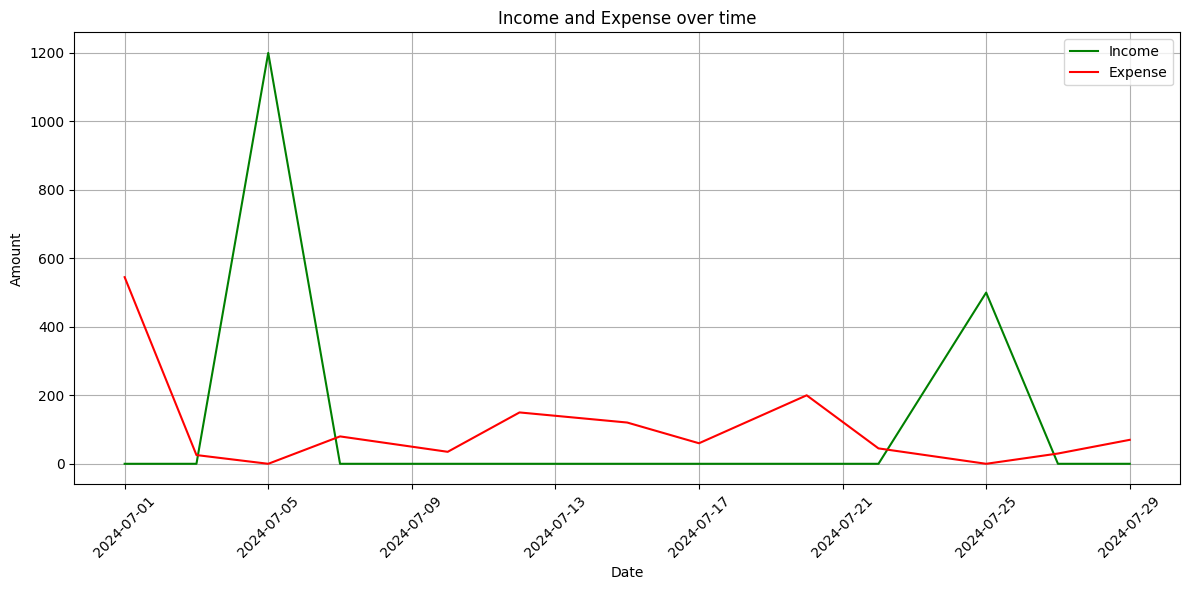


===== Personal Finance Manager =====

1. Add a new transaction
2. View transaction and summary within a date range
3. Generate financial report
4. Add a financial goal
5. View your financial goal
6. Exit
Enter your choice(1-6): 6
Thank you for using Personal Finance Manager. Goodbye!
Exiting......


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
from datetime import datetime
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch
from reportlab.lib import utils

import io

date_format= "%d-%m-%Y"
CATEGORIES={'I':'Income','E':'Expense'}
financial_goals = []


class CSV:
  CSV_FILE="finance_data.csv"
  COLUMNS=["date","amount","category","description"]

  @classmethod
  def initialise_csv(cls):
    try:
      pd.read_csv(cls.CSV_FILE)
    except FileNotFoundError:
      df=pd.DataFrame(columns=cls.COLUMNS)
      df.to_csv(cls.CSV_FILE,index=False)

  @classmethod
  def add_entry(cls,date,amount,category,description):
      new_entry={
          "date":date,
          "amount":amount,
          "category":category,
          "description":description,
      }

      with open(cls.CSV_FILE,"a",newline="") as csvfile:
        writer=csv.DictWriter(csvfile,fieldnames=cls.COLUMNS)
        writer.writerow(new_entry)
      print("added successfully...!")

  @classmethod
  def get_transaction(cls,start_date,end_date):
    df=pd.read_csv(cls.CSV_FILE)
    df['date']=pd.to_datetime(df['date'],format=date_format)
    start_date=datetime.strptime(start_date,date_format)
    end_date=datetime.strptime(end_date,date_format)

    mask=(df['date']>=start_date) & (df['date']<=end_date)

    filtered_df=df.loc[mask]

    if filtered_df.empty:
      print("No transaction found in the given date range.")
    else:
      print(f"transaction from {start_date.strftime(date_format)} to {end_date.strftime(date_format)}")

      print(filtered_df.to_string(
          index=False,formatters={"date": lambda x:x.strftime(date_format)}
      ))
      total_income=filtered_df[filtered_df['category']=="Income"]['amount'].sum()
      total_Expenses=filtered_df[filtered_df['category']=="Expense"]['amount'].sum()
      net_saving=total_income-total_Expenses


      savings_rate = (total_income - total_Expenses) / total_income if total_income > 0 else 0

      insights = []

      if savings_rate < 0.1:
          insights.append("Your savings rate is low. Consider reducing non-essential expenses to increase your savings.")
      elif savings_rate > 0.2:
          insights.append("Great job! Your savings rate is healthy. Keep it up!")

      expense_categories = df[df['category'] == 'Expense'].groupby('description')['amount'].sum()
      top_expense = expense_categories.idxmax()
      insights.append(f"Your highest expense category is '{top_expense}'. Review if there's room for reduction.")

      if total_Expenses > total_income:
          insights.append("Warning: Your expenses exceed your income. This is unsustainable in the long term.")

      print("\nSummary:")
      print(f"Total Income: {total_income:.2f}")
      print(f"Total Expense: {total_Expenses:.2f} ")
      print(f"Net Saving: {net_saving:.2f}")
      print("\nFinancial Insights:")
      for insight in insights:
          print("- " + insight)

    return filtered_df



class FinancialGoal:
    def __init__(self, name, target_amount, target_date):
        self.name = name
        self.target_amount = target_amount
        self.target_date = datetime.strptime(target_date, date_format)
        self.current_amount = 0

    def update_progress(self, amount):
        self.current_amount += amount

    def get_progress(self):
        return (self.current_amount / self.target_amount) * 100



def add_financial_goal():
    name = input("Enter goal name: ")
    target_amount = float(input("Enter target amount: "))
    target_date = get_date("Enter target date (dd-mm-yyyy): ")
    goal = FinancialGoal(name, target_amount, target_date)
    financial_goals.append(goal)
    print(f"Added new goal: {name}")

def update_goals(amount, category):
    if category == "Income":
        for goal in financial_goals:
            goal.update_progress(amount)

def view_goals():
    for goal in financial_goals:
        progress = goal.get_progress()
        print(f"{goal.name}: {progress:.2f}% completed")
        print(f"Target: {goal.target_amount:.2f}, Current: {goal.current_amount:.2f}")
        print(f"Target Date: {goal.target_date.strftime(date_format)}")
        print()






def get_date(prompt,allow_default=False):
  date_str=input(prompt)
  if allow_default and not date_str:
    return datetime.today().strftime(date_format)

  try:
    valid_date=datetime.strptime(date_str,date_format)
    return valid_date.strftime(date_format)
  except ValueError:
    print("Invalid date format. Please enter the date in dd-mm-yyyy format.")
    return get_date(prompt,allow_default)

def get_amount():
  amount=float(input("Enter the amount: "))
  try:
    if amount<=0:
      raise ValueError("Amount must be non-negative non-zero value.")
    return amount
  except ValueError as e:
    print(e)
    return get_amount()


def get_category():
  category=input("Enter the category ('I' for Income or 'E' for Expense): ").upper()
  if category in CATEGORIES:
    return CATEGORIES[category]

  print("Invalid category. Please enter 'I' for Income or 'E' for Expense.")
  return get_category()

def get_description():
  return input("Enter a description (optional): ")





def generate_financial_report():
    while True:
        print("\nGenerate Financial Report")
        print("1. Yearly Report")
        print("2. Monthly Report")
        print("3. Return to Main Menu")

        choice = input("Enter your choice (1-3): ")

        if choice == "1":
            year = input("Enter the year for the report (YYYY): ")
            start_date = f"01-01-{year}"
            end_date = f"31-12-{year}"
            period = "Yearly"
        elif choice == "2":
            year = input("Enter the year for the report (YYYY): ")
            month = input("Enter the month for the report (1-12): ")
            try:
                month = int(month)
                if month < 1 or month > 12:
                    raise ValueError("Month must be between 1 and 12")
                start_date = f"01-{month:02d}-{year}"
                end_date = f"{pd.Period(f'{year}-{month}').days_in_month:02d}-{month:02d}-{year}"
                period = "Monthly"
            except ValueError as e:
                print(f"Invalid month: {e}")
                continue
        elif choice == "3":
            return  # Return to main menu
        else:
            print("Invalid choice. Please try again.")
            continue

        df = CSV.get_transaction(start_date, end_date)

        if df.empty:
            print("No transactions found for the specified period.")
            continue

        report_title = f"{period} Financial Report for {start_date} to {end_date}"
        print(f"\n{report_title}")

        # Calculate total income and expenses
        total_income = df[df['category'] == 'Income']['amount'].sum()
        total_expenses = df[df['category'] == 'Expense']['amount'].sum()
        net_savings = total_income - total_expenses

        print(f"\nTotal Income: {total_income:.2f}")
        print(f"Total Expenses: {total_expenses:.2f}")
        print(f"Net Savings: {net_savings:.2f}")

        print("\nCategory Breakdown:")
        category_breakdown = df.groupby('category')['amount'].sum()
        print(category_breakdown)

        img_path = plot_transaction(df)

        if input("\nDo you want to export this report as a PDF? (y/n): ").lower() == 'y':
            export_report_pdf(report_title, total_income, total_expenses, net_savings, category_breakdown, df, img_path)

        if input("\nDo you want to generate another report? (y/n): ").lower() != 'y':
            break



def export_report_pdf(title, total_income, total_expenses, net_savings, category_breakdown, df, img_path):
    buffer = io.BytesIO()
    doc = SimpleDocTemplate(buffer, pagesize=letter)
    elements = []

    styles = getSampleStyleSheet()
    elements.append(Paragraph(title, styles['Title']))
    elements.append(Spacer(1, 12))

    # Summary table
    summary_data = [
        ['Total Income', f'{total_income:.2f}'],
        ['Total Expenses', f'{total_expenses:.2f}'],
        ['Net Savings', f'{net_savings:.2f}']
    ]
    summary_table = Table(summary_data)
    summary_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 14),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('TEXTCOLOR', (0, 1), (-1, -1), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica'),
        ('FONTSIZE', (0, 0), (-1, 0), 12),
        ('TOPPADDING', (0, 1), (-1, -1), 6),
        ('BOTTOMPADDING', (0, -1), (-1, -1), 6),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))
    elements.append(summary_table)
    elements.append(Spacer(1, 12))

    # Category breakdown table
    elements.append(Paragraph("Category Breakdown", styles['Heading2']))
    elements.append(Spacer(1, 6))
    category_data = [['Category', 'Amount']] + [[cat, f'{amount:.2f}'] for cat, amount in category_breakdown.items()]
    category_table = Table(category_data)
    category_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 12),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('TEXTCOLOR', (0, 1), (-1, -1), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica'),
        ('FONTSIZE', (0, 0), (-1, 0), 10),
        ('TOPPADDING', (0, 1), (-1, -1), 6),
        ('BOTTOMPADDING', (0, -1), (-1, -1), 6),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))
    elements.append(category_table)
    elements.append(Spacer(1, 12))

    # Add the plot image
    elements.append(Paragraph("Income and Expense Graph", styles['Heading2']))
    elements.append(Spacer(1, 6))
    img = utils.ImageReader(img_path)
    img_width, img_height = img.getSize()
    aspect = img_height / float(img_width)
    elements.append(Image(img_path, width=6*inch, height=(6*inch*aspect)))

    # Build the PDF
    doc.build(elements)
    buffer.seek(0)

    # Save the PDF
    with open(f'financial_report_{title.replace(" ", "_")}.pdf', 'wb') as f:
        f.write(buffer.getvalue())
    print(f"PDF report saved as 'financial_report_{title.replace(' ', '_')}.pdf'")






def add():
  CSV.initialise_csv()
  date=get_date(
      "Enter the date of transaction (dd-mm-yyyy) or enter for today's date: ",
      allow_default=True
  )
  amount=get_amount()
  category=get_category()
  description=get_description()
  CSV.add_entry(date,amount,category,description)
  update_goals(amount, category)






def plot_transaction(df):
    df['date'] = pd.to_datetime(df['date'], format=date_format)
    df.set_index("date", inplace=True)

    income_df = (
        df[df['category'] == 'Income']
        .resample("D")
        .sum()
        .reindex(df.index, fill_value=0)
    )

    expense_df = (
        df[df['category'] == 'Expense']
        .resample("D")
        .sum()
        .reindex(df.index, fill_value=0)
    )

    plt.figure(figsize=(12, 6))
    plt.plot(income_df.index, income_df['amount'], label='Income', color='g')
    plt.plot(expense_df.index, expense_df['amount'], label='Expense', color='r')
    plt.xlabel("Date")
    plt.ylabel("Amount")
    plt.title("Income and Expense over time")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot as an image
    img_path = 'transaction_plot.png'
    plt.savefig(img_path)


    # Show the plot
    plt.show()

    return img_path


def main():
  while True:
    print("\n===== Personal Finance Manager =====")
    print("\n1. Add a new transaction")
    print("2. View transaction and summary within a date range")
    print("3. Generate financial report")
    print("4. Add a financial goal")
    print("5. View your financial goal")
    print("6. Exit")
    print("=====================================")

    c=input("Enter your choice(1-6): ")

    if c=="1":
      add()
    elif c=="2":
      start_date=input("Enter the start date (dd-mm-yyyy): ")
      end_date=input("Enter the end date(dd-mm-yyyy): ")
      df=CSV.get_transaction(start_date,end_date)
      if input("Do you want to see a plot (y/n): ").lower()=='y':
        plot_transaction(df)

    elif c == "3":
      generate_financial_report()
    elif c == "4":
      add_financial_goal()

    elif c == "5":
      view_goals()

    elif c=="6":
      print("Thank you for using Personal Finance Manager. Goodbye!")
      print("Exiting......")
      break

    else:
      print("Invalid choice. Enter 1, 2, 3, 4, 5 or 6. ")



if __name__=='__main__':
  main()


